**Menginstall library ucimlrepo**

In [ ]:
pip install ucimlrepo

**Mendownload data**

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_failure_clinical_records = fetch_ucirepo(id=519)

# data (as pandas dataframes)
x = heart_failure_clinical_records.data.features
y = heart_failure_clinical_records.data.targets

print(x)
print(y)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

**Mengecek data kosong**

In [ ]:
x.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


**Membagi data menjadi 2, biner dan non biner**

**Melakukan PCA terhadap data biner**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# print(X)
feature_pca = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
feature = []

for i in x:
  if i not in feature_pca:
    feature.append(i)

data_biner = x[feature_pca]
data_non_biner = x[feature]

print(data_biner)
print(data_non_biner)
# proses PCA
pca = PCA(n_components=1)
pca_data = pca.fit_transform(data_biner)

pca_df = pd.DataFrame(pca_data, columns=["PCA"])

print("Data PCA:")
print(pca_df)

     anaemia  diabetes  high_blood_pressure  sex  smoking
0          0         0                    1    1        0
1          0         0                    0    1        0
2          0         0                    0    1        1
3          1         0                    0    1        0
4          1         1                    0    0        0
..       ...       ...                  ...  ...      ...
294        0         1                    1    1        1
295        0         0                    0    0        0
296        0         1                    0    0        0
297        0         0                    0    1        1
298        0         0                    0    1        1

[299 rows x 5 columns]
      age  creatinine_phosphokinase  ejection_fraction  platelets  \
0    75.0                       582                 20  265000.00   
1    55.0                      7861                 38  263358.03   
2    65.0                       146                 20  162000.00   
3   

**Menggabungkan data non biner dengan data hasil PCA**

In [ ]:
data = pd.concat([data_non_biner, pca_df], axis=1)
print(data)

      age  creatinine_phosphokinase  ejection_fraction  platelets  \
0    75.0                       582                 20  265000.00   
1    55.0                      7861                 38  263358.03   
2    65.0                       146                 20  162000.00   
3    50.0                       111                 20  210000.00   
4    65.0                       160                 20  327000.00   
..    ...                       ...                ...        ...   
294  62.0                        61                 38  155000.00   
295  55.0                      1820                 38  270000.00   
296  45.0                      2060                 60  742000.00   
297  45.0                      2413                 38  140000.00   
298  50.0                       196                 45  395000.00   

     serum_creatinine  serum_sodium  time       PCA  
0                 1.9           130     4  0.179355  
1                 1.1           136     6  0.361319  
2        

**Melakukan standarisasi terhadap data**

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Transformasi data
data_standar = scaler.fit_transform(data)

# Konversi hasil ke DataFrame
df_standar = pd.DataFrame(data_standar, columns=data.columns)
print("\nData Setelah Standarisasi:\n", df_standar)
# df_standar.to_csv('df_standar.csv', index=False)


Data Setelah Standarisasi:
           age  creatinine_phosphokinase  ejection_fraction     platelets  \
0    1.192945                  0.000166          -1.530560  1.681648e-02   
1   -0.491279                  7.514640          -0.007077  7.535660e-09   
2    0.350833                 -0.449939          -1.530560 -1.038073e+00   
3   -0.912335                 -0.486071          -1.530560 -5.464741e-01   
4    0.350833                 -0.435486          -1.530560  6.517986e-01   
..        ...                       ...                ...           ...   
294  0.098199                 -0.537688          -0.007077 -1.109765e+00   
295 -0.491279                  1.278215          -0.007077  6.802472e-02   
296 -1.333392                  1.525979           1.854958  4.902082e+00   
297 -1.333392                  1.890398          -0.007077 -1.263389e+00   
298 -0.912335                 -0.398321           0.585389  1.348231e+00   

     serum_creatinine  serum_sodium      time       PCA  


**Membuat model klustering menggunakan metode K-Means**

Menentukan nilai K yang optimal dengan metode Ellbow

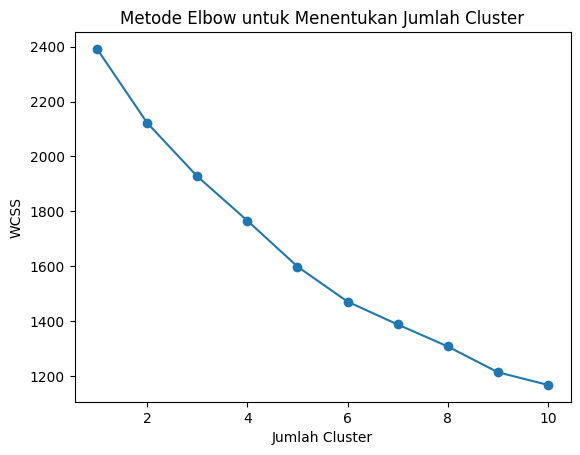

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=4, random_state=92)
    kmeans.fit(df_standar)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

Diperoleh nilai K optimal 2

In [ ]:
from sklearn.cluster import KMeans

optimal_k = 2

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=1000, n_init=4, random_state=92)
y_kmeans = kmeans.fit_predict(df_standar)
kmeans.inertia_

2122.3414277218867

**Visualisasi hasil model dengan kluster dan centroid kluster**

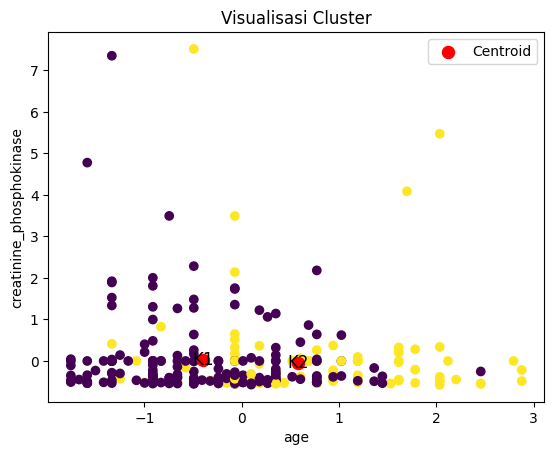

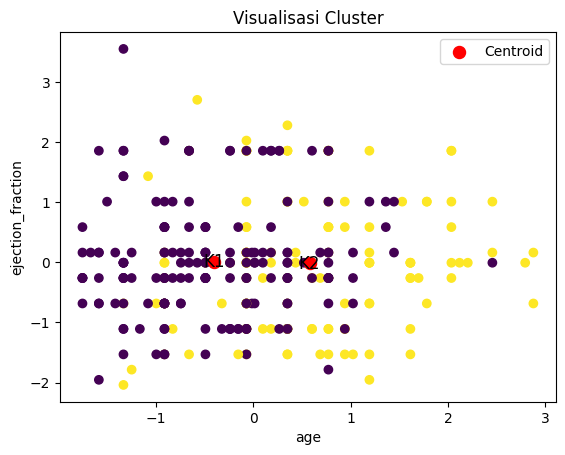

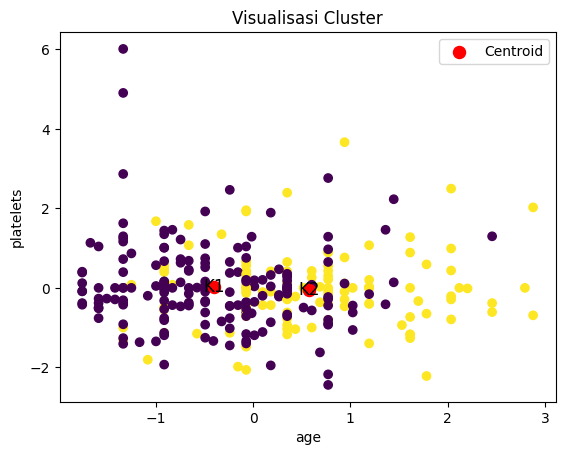

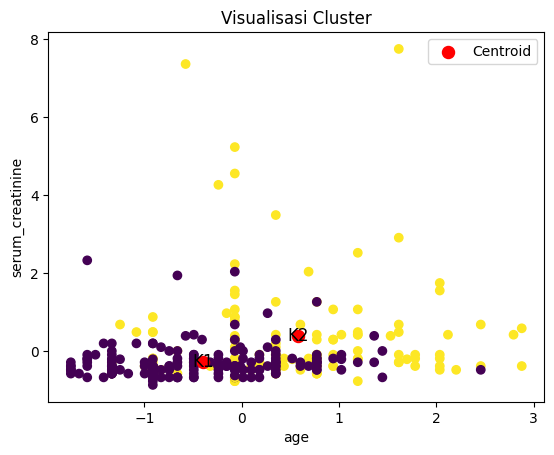

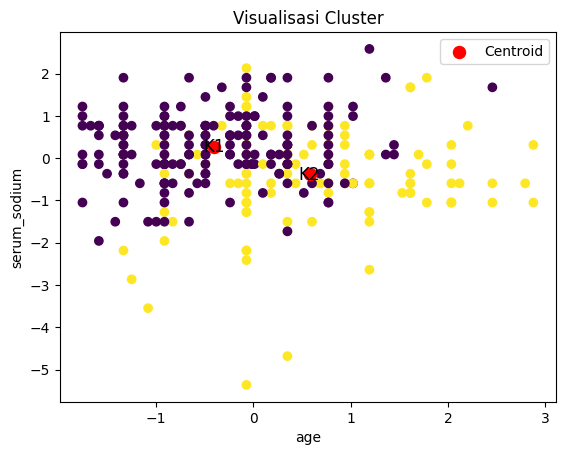

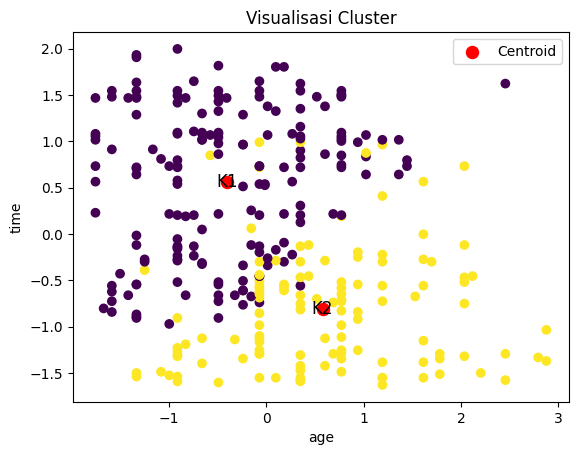

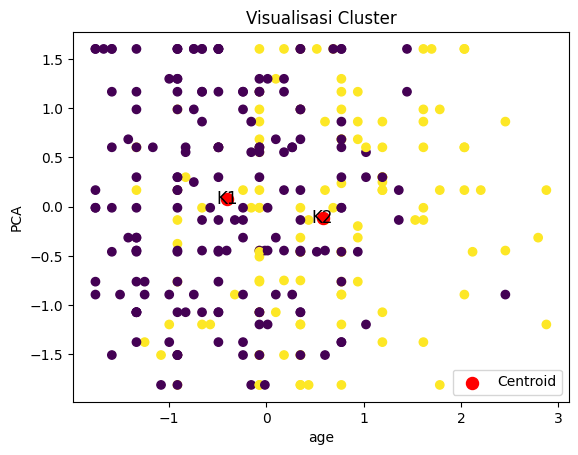

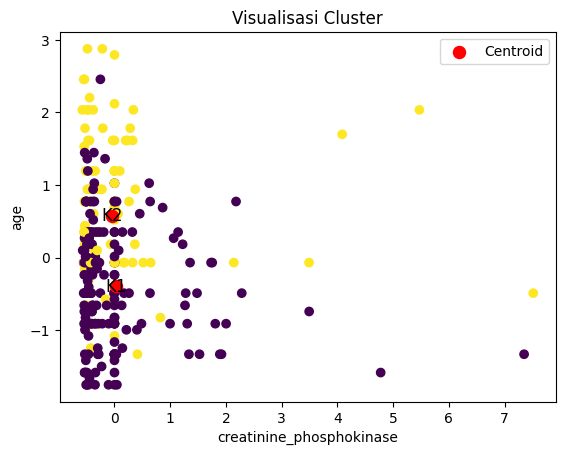

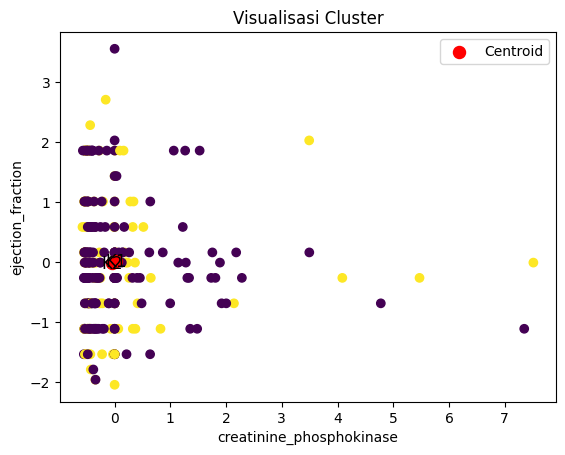

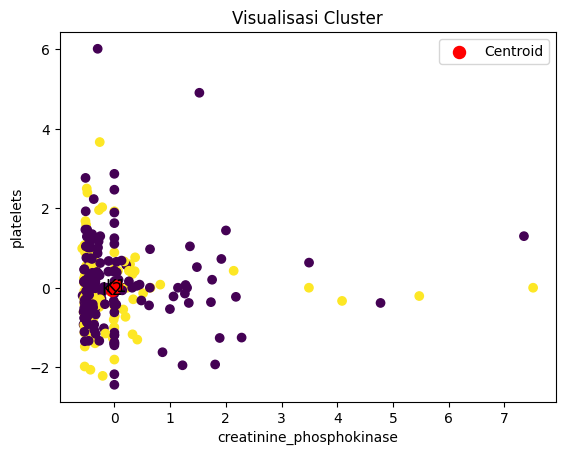

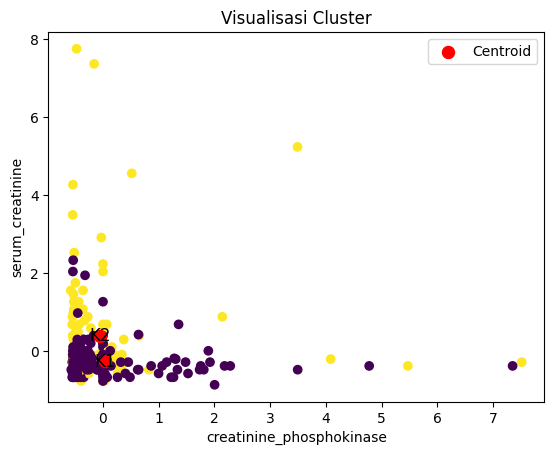

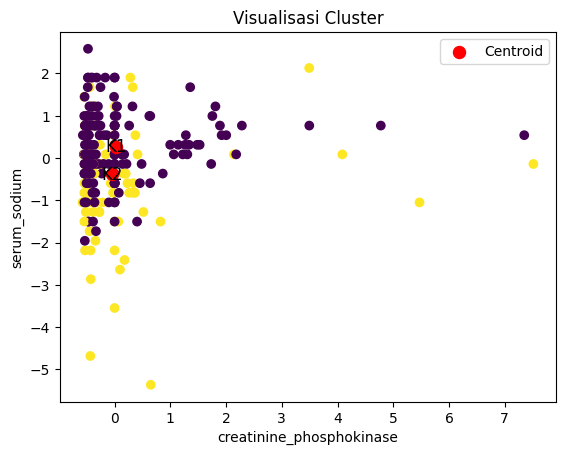

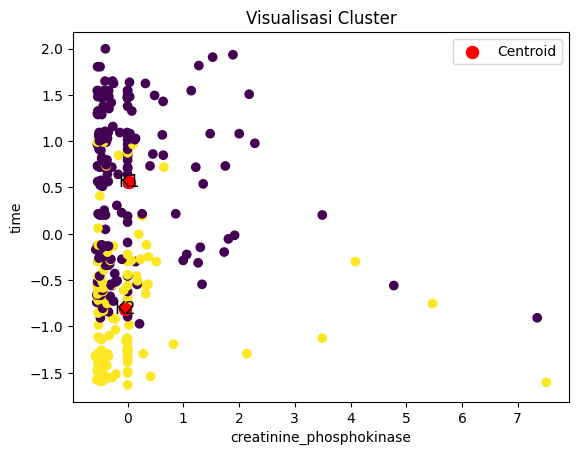

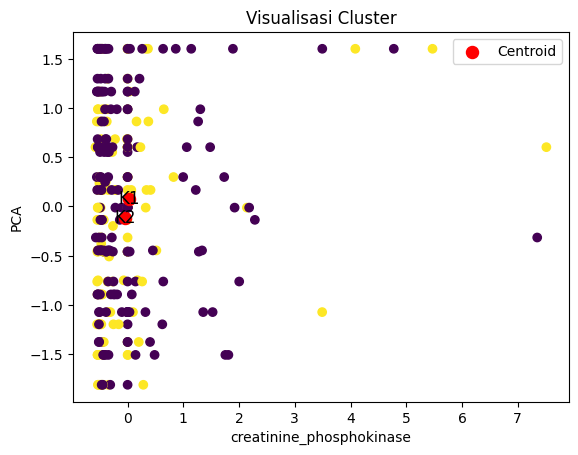

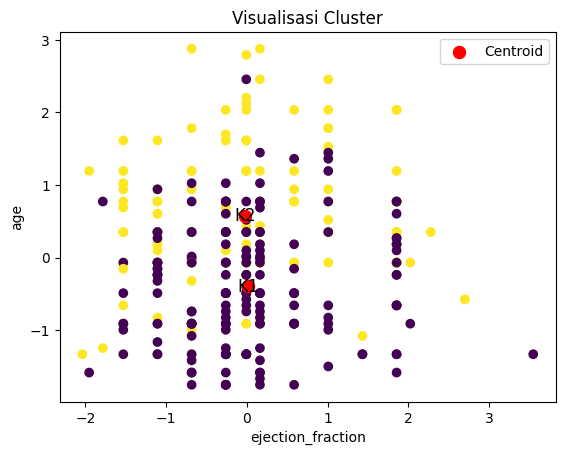

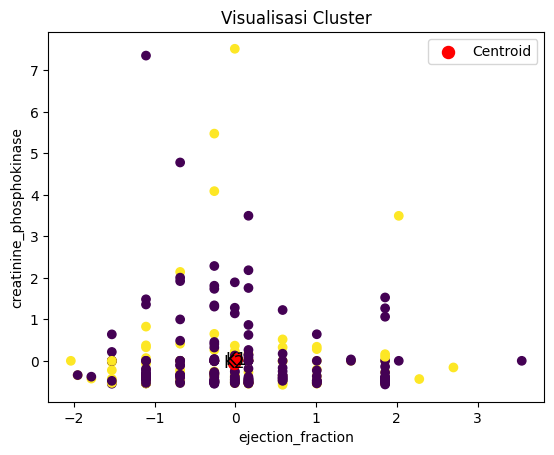

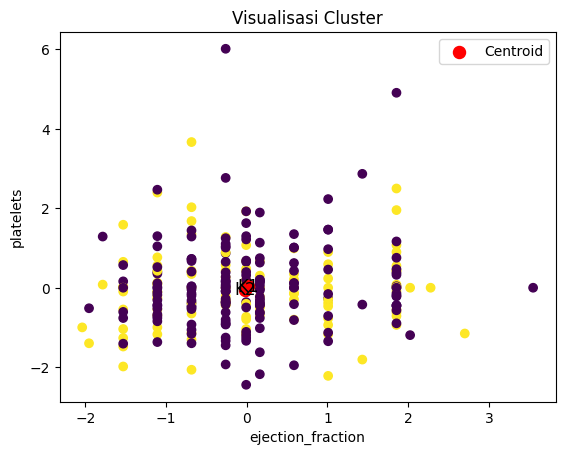

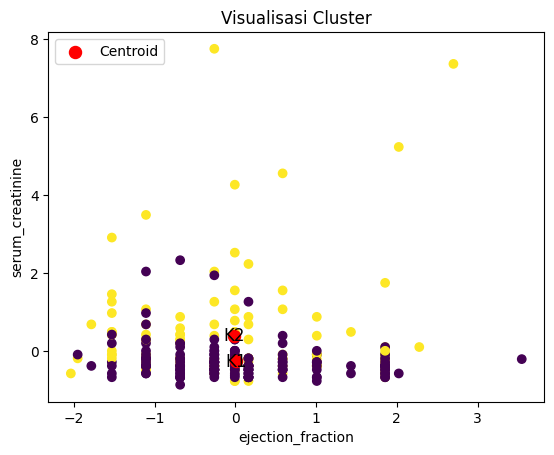

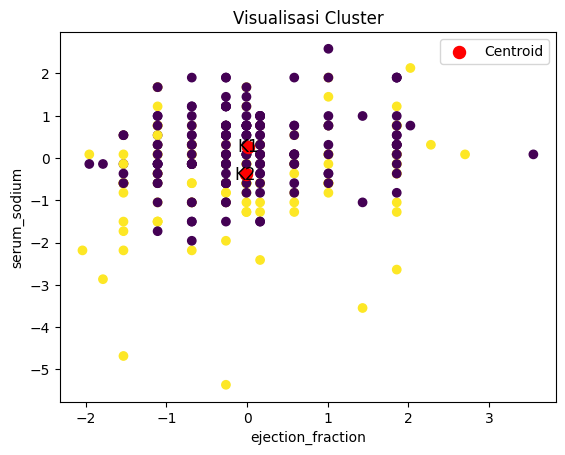

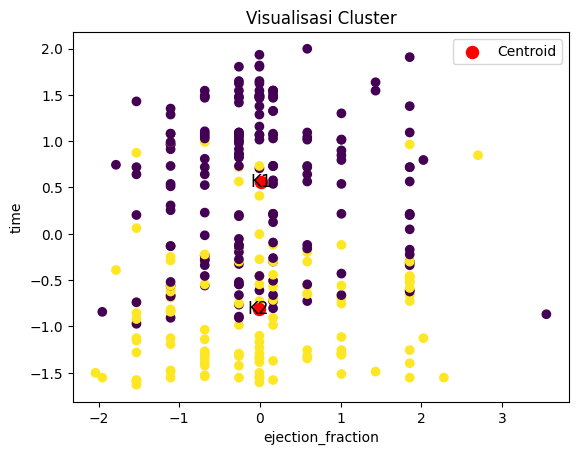

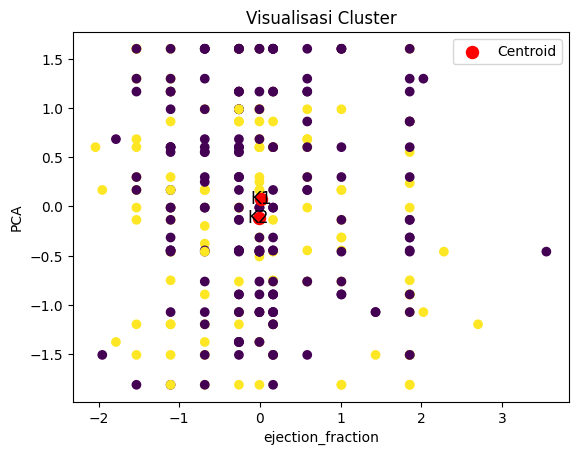

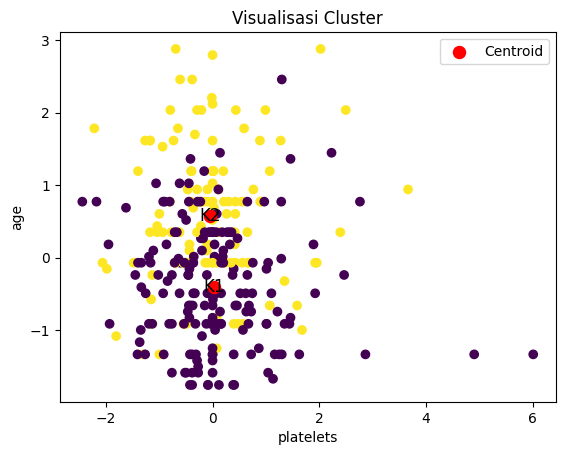

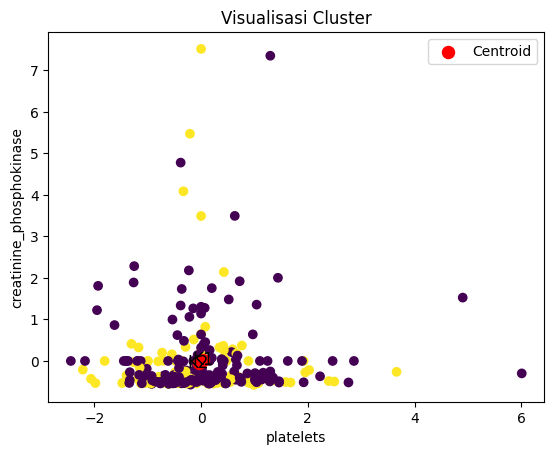

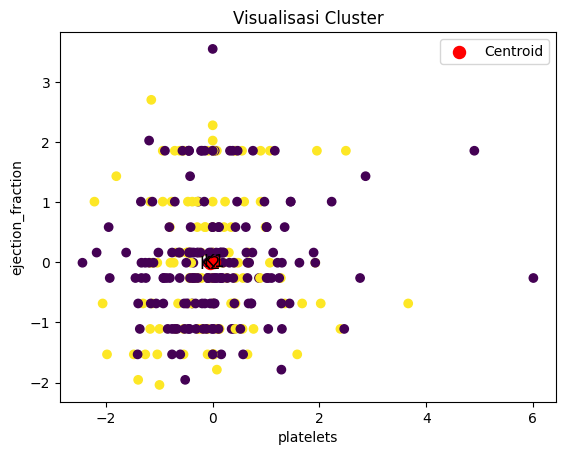

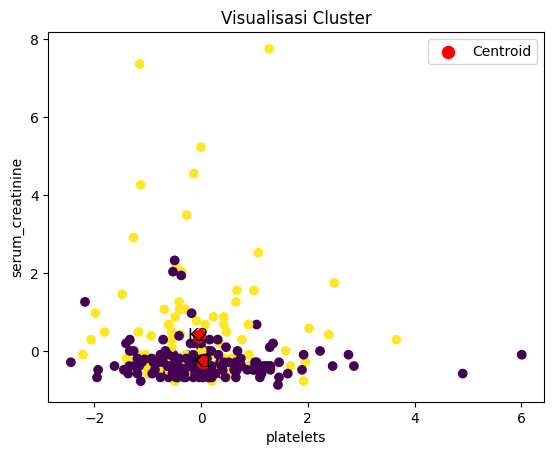

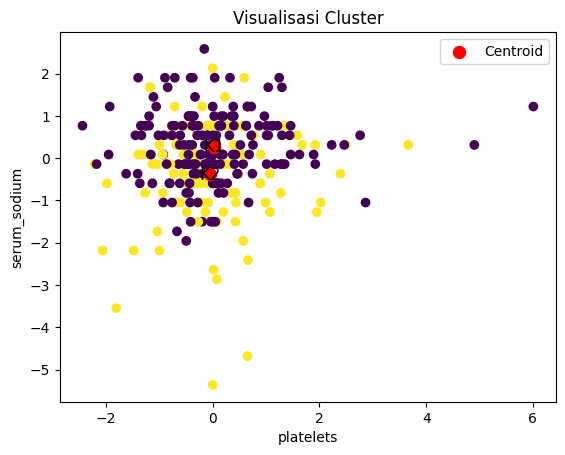

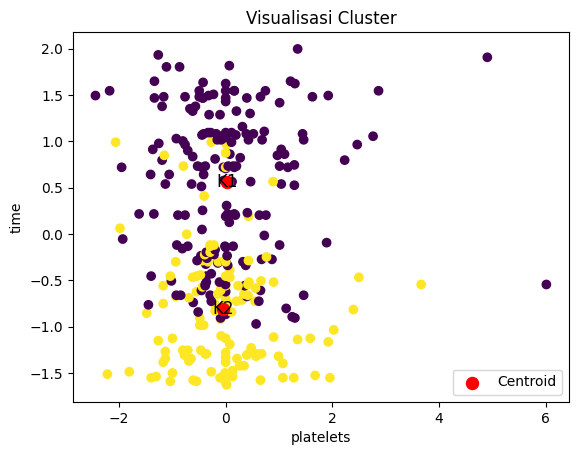

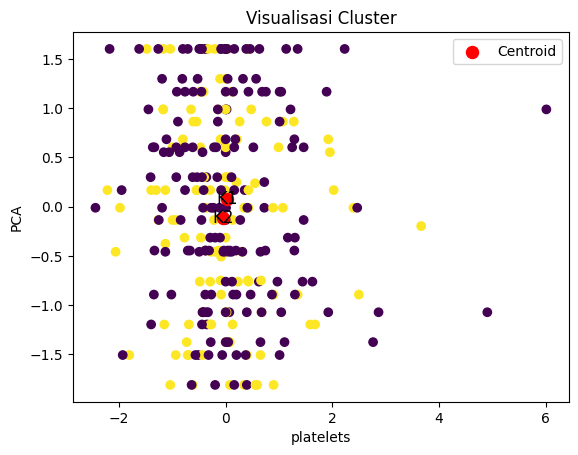

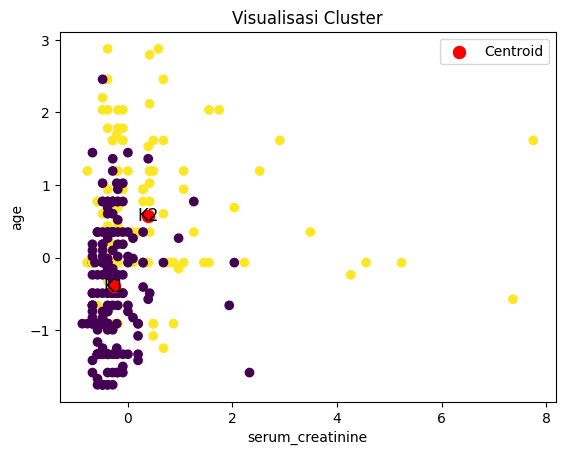

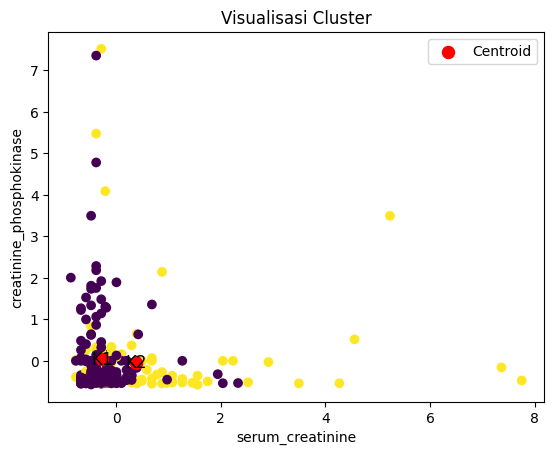

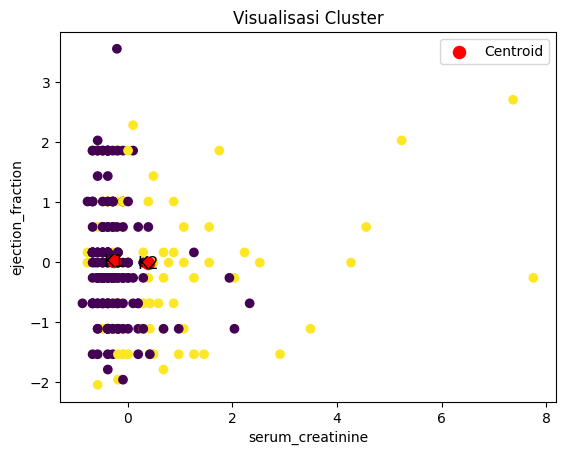

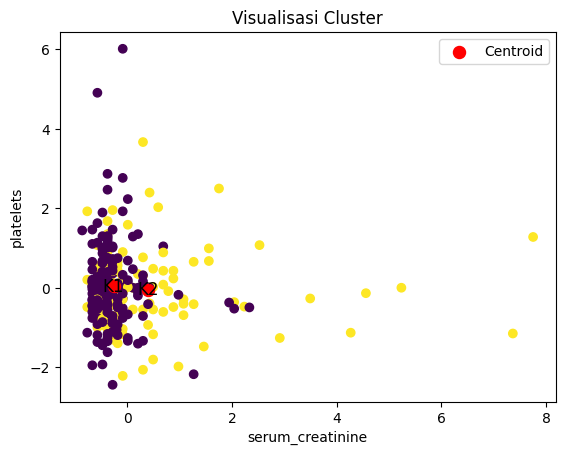

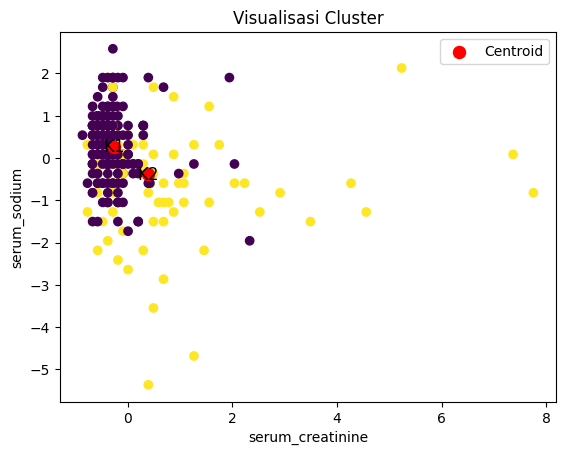

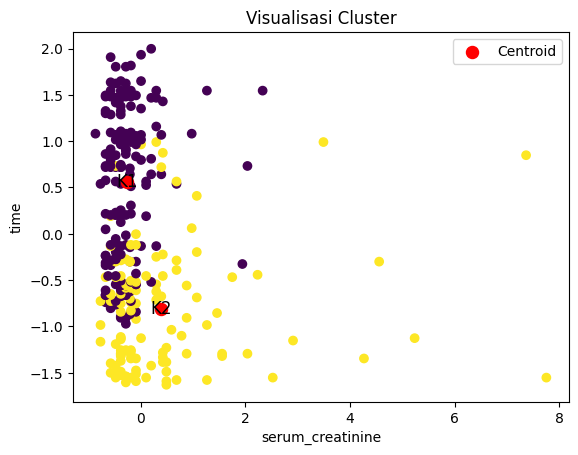

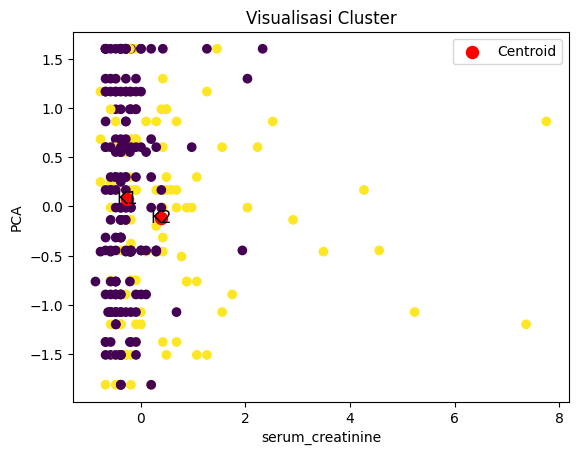

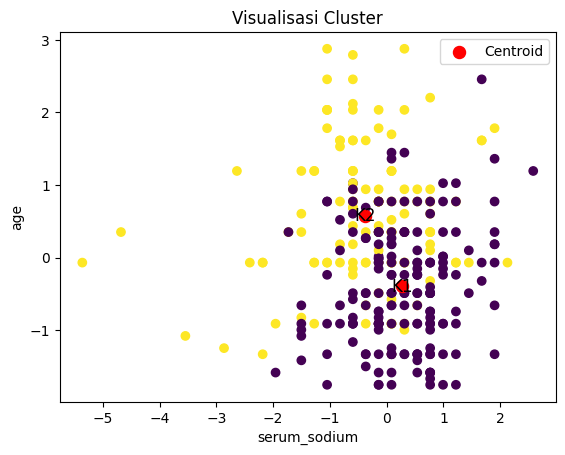

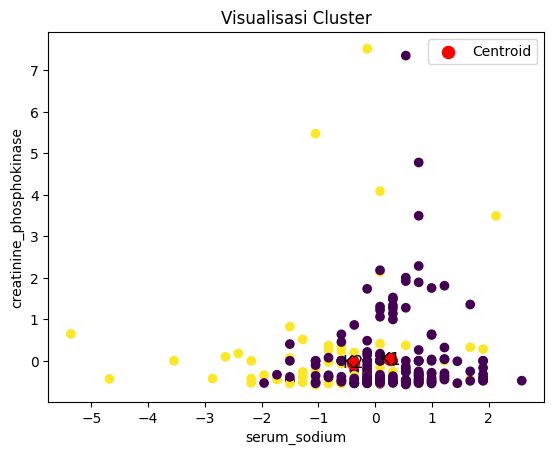

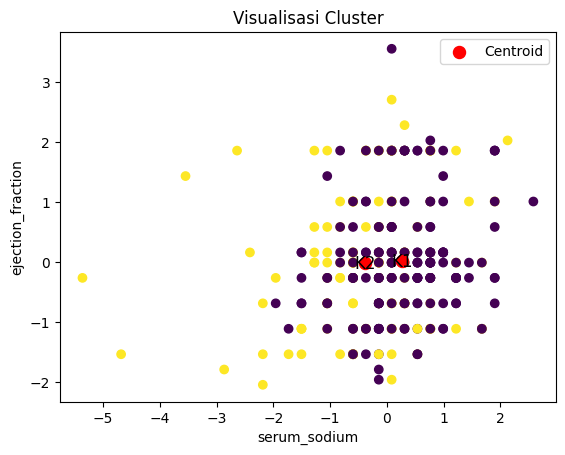

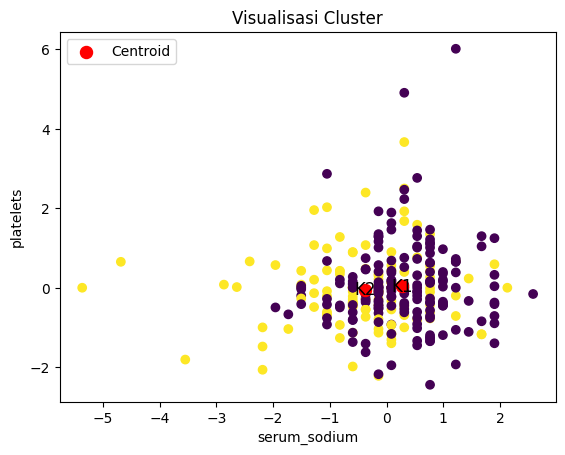

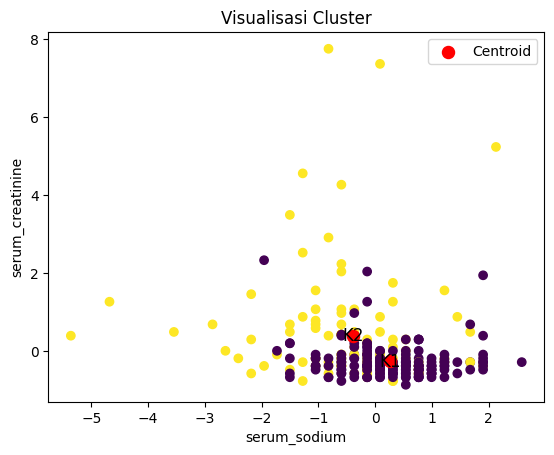

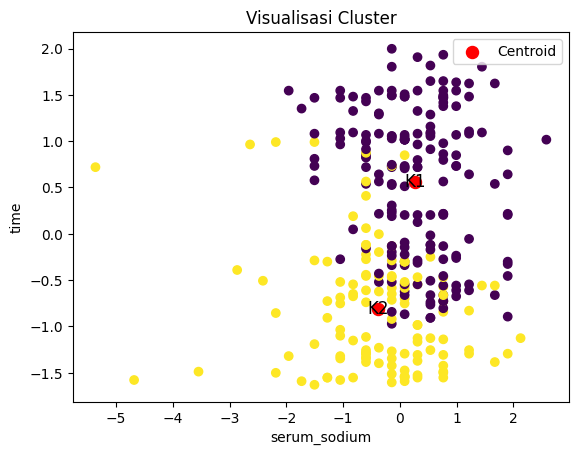

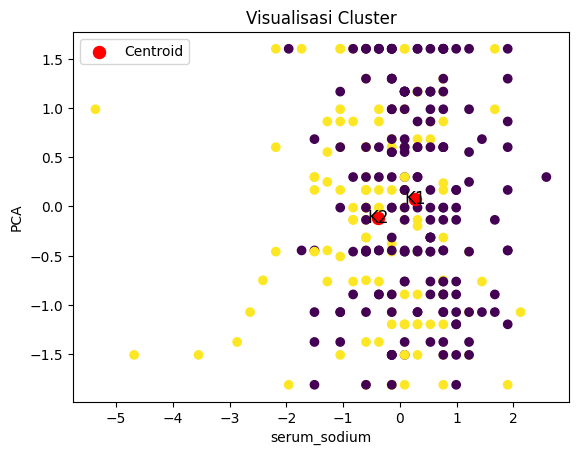

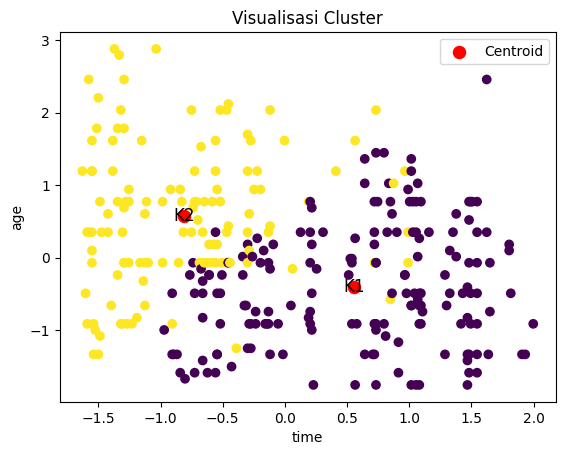

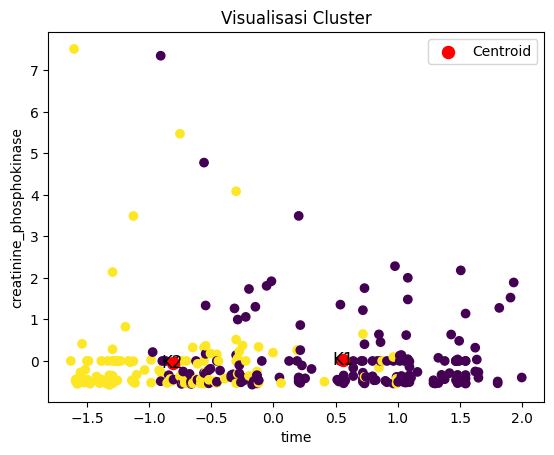

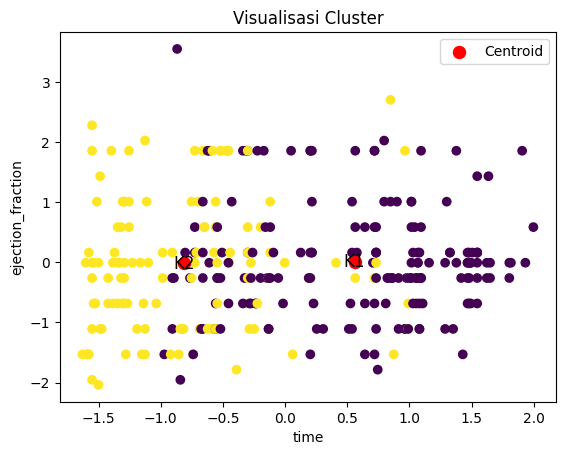

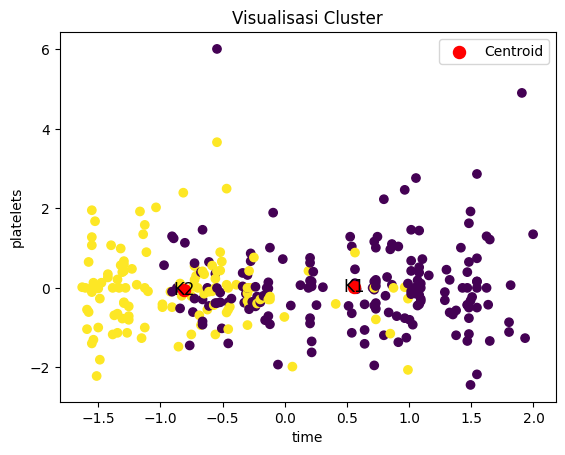

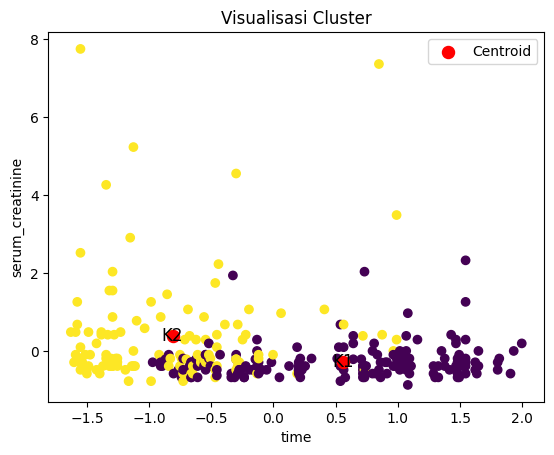

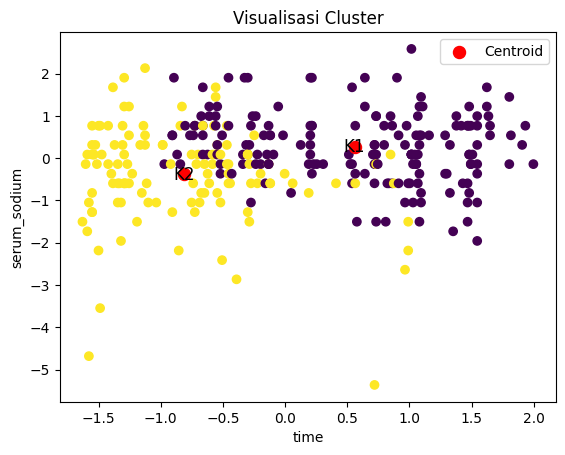

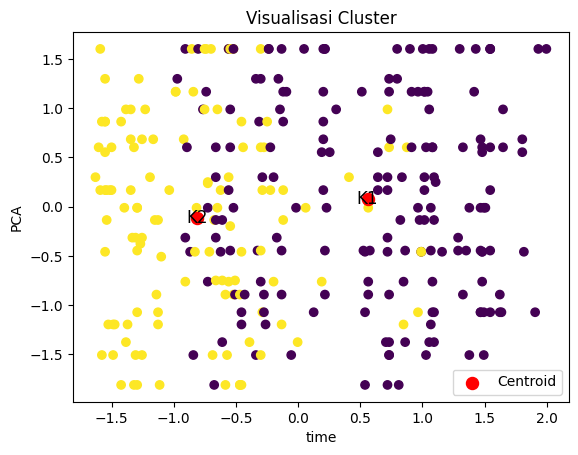

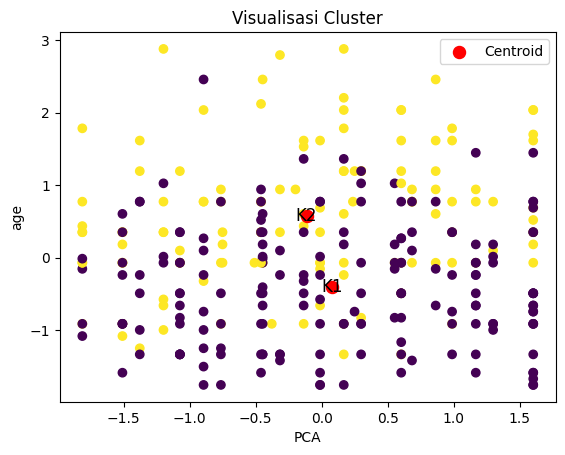

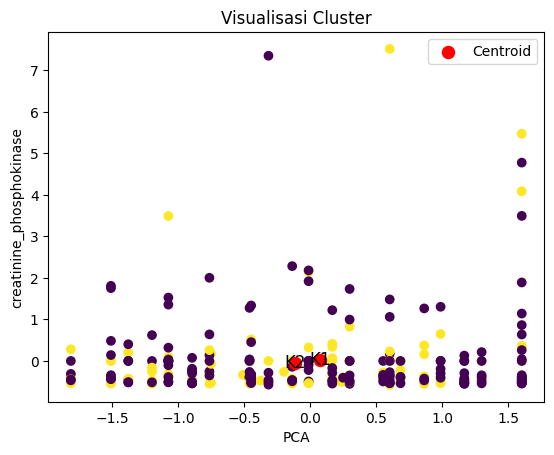

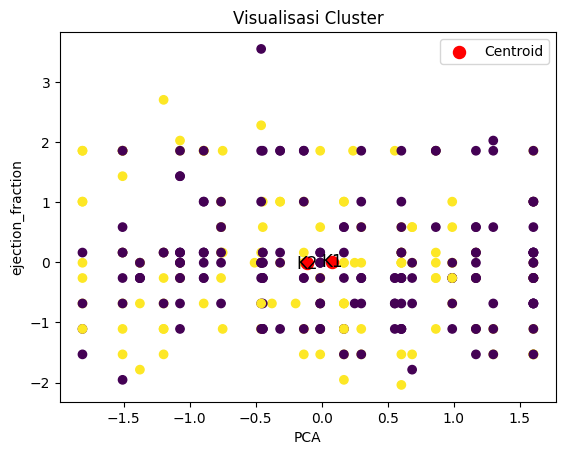

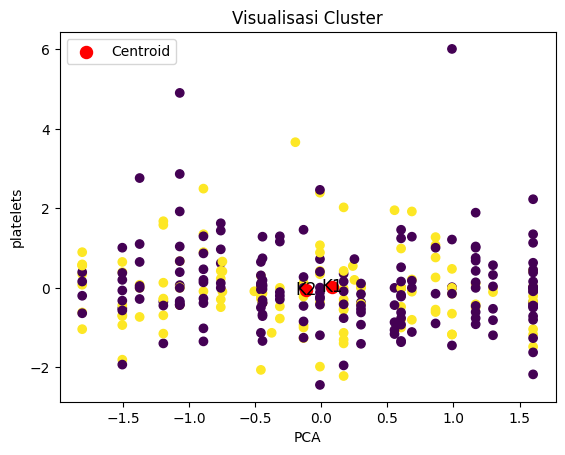

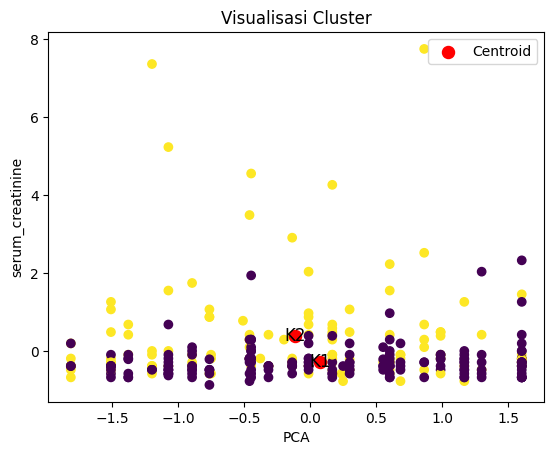

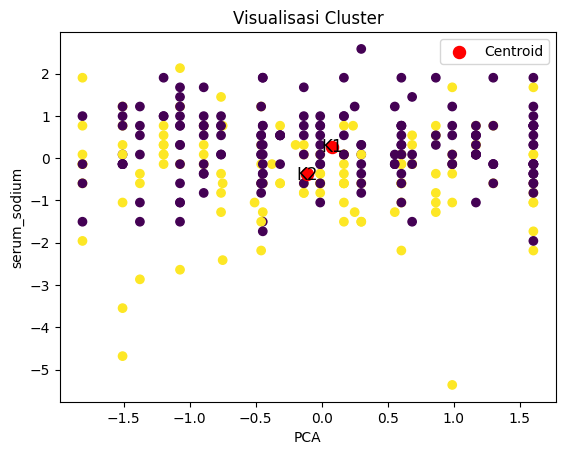

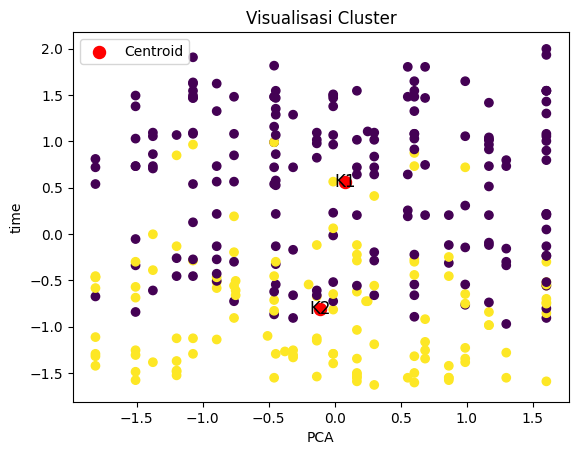

In [ ]:
list_feature = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', "serum_creatinine", 'serum_sodium', 'time', 'PCA']
for k in list_feature:
  for m in list_feature:
    if k != m:
      plt.scatter(df_standar[k], df_standar[m], c=kmeans.labels_)
      plt.scatter(kmeans.cluster_centers_[:2,list_feature.index(k)], kmeans.cluster_centers_[:2,list_feature.index(m)],
                  s=300, c='red', marker='.', label='Centroid')
      for i, center in enumerate(kmeans.cluster_centers_):
          plt.text(center[list_feature.index(k)], center[list_feature.index(m)], f'K{i+1}', color='black', fontsize=12, ha='center', va='center')
      plt.title("Visualisasi Cluster")
      plt.xlabel(k)
      plt.ylabel(m)
      plt.legend()
      plt.show()

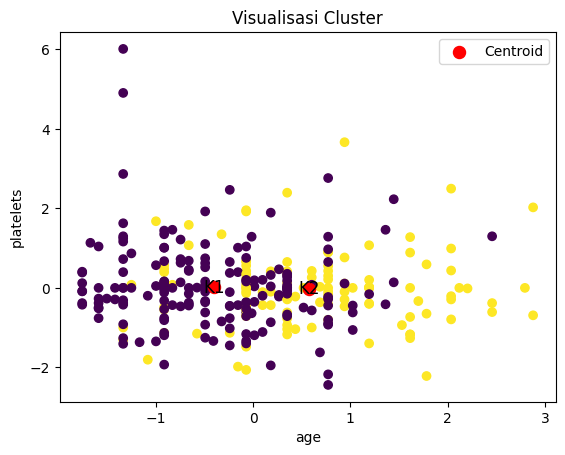

In [ ]:
plt.scatter(df_standar['age'], df_standar['platelets'], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:2,0], kmeans.cluster_centers_[:2,2],
            s=300, c='red', marker='.', label='Centroid')
for i, center in enumerate(kmeans.cluster_centers_):
    plt.text(center[0], center[2], f'K{i+1}', color='black', fontsize=12, ha='center', va='center')
plt.title("Visualisasi Cluster")
plt.xlabel("age")
plt.ylabel("platelets")
plt.legend()
plt.show()

**Mengecek hasil akurasi model**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

def find_best_kmeans(data, n_clusters, n_iterations=100):
    param_dist = {'n_init': range(100, 151),'random_state': range(100)}

    kmeans = KMeans(n_clusters=n_clusters,init='k-means++',max_iter=1000)

    random_search = RandomizedSearchCV(kmeans,param_distributions=param_dist,n_iter=n_iterations,cv=5,random_state=42)

    random_search.fit(data)

    return random_search.best_estimator_, random_search.best_score_

a, b = find_best_kmeans(df_standar, 2)

print(a)
print(b)

KMeans(max_iter=1000, n_clusters=2, n_init=137, random_state=4)
-497.3346835229394


In [ ]:

from sklearn.cluster import KMeans

nilai_random_state = 0
nilai_akurasi = 0


# while True:

for j in range(100):
  kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=1000, n_init=4, random_state=j)
  y_kmeans = kmeans.fit_predict(df_standar)
  kmeans.inertia_

  y = pd.DataFrame(y)
  y_list = []
  for index,i in y.iterrows():
    y_list.append(i[0])
  correct_labels = sum(y_list == y_kmeans)

  # print(f"nilai nilai_random_state : {j}")
  # print("Result: %d out of %d samples were correctly labeled." % (correct_labels, len(y_list)))
  # print('Accuracy score: {0:0.2f}'. format(correct_labels/float(len(y))))
  if correct_labels/float(len(y)) > nilai_akurasi:
    nilai_akurasi = correct_labels/float(len(y))
    nilai_random_state = j

print(f"=========== nilai akurasi {nilai_akurasi} dengan nilai_random_state : {nilai_random_state} ===========")
print('Accuracy score: {0:0.2f}'. format(nilai_akurasi))
# print(f"n_init : {n_init}")

<ipython-input-13-4fa3360b80fb>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_list.append(i[0])
<ipython-input-13-4fa3360b80fb>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_list.append(i[0])
<ipython-input-13-4fa3360b80fb>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_list.append(i[0])
<ipython-input-13-4fa3360b80fb>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future versio

=========== nilai akurasi 0.7792642140468228 dengan nilai_random_state : 92 ===========
Accuracy score: 0.78


<ipython-input-13-4fa3360b80fb>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_list.append(i[0])
<ipython-input-13-4fa3360b80fb>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_list.append(i[0])
<ipython-input-13-4fa3360b80fb>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_list.append(i[0])
<ipython-input-13-4fa3360b80fb>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future versio

In [ ]:
print(kmeans.labels_)
print(list(y['death_event']))

benar = 0

for i in range(len(kmeans.labels_)):
  print(f"{kmeans.labels_[i]} || {list(y['death_event'])[i]}")
  if kmeans.labels_[i] == list(y['death_event'])[i]:
    benar +=1

print(f"benar: {benar} dari {len(kmeans.labels_)}")

[1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1
 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1
 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1
 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0
 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0
 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0